In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open("/sietch_colab/akapoor/Demographic_Inference/software_inferences_sim_85.pkl", "rb") as f:
    data = pickle.load(f)

In [6]:
data.keys()

dict_keys(['simulated_params', 'sfs', 'model_sfs_dadi', 'opt_theta_dadi', 'opt_params_dadi', 'll_all_replicates_dadi', 'model_sfs_moments', 'opt_theta_moments', 'opt_params_moments', 'll_all_replicates_moments'])

In [5]:
data['simulated_params']

{'N0': 9346,
 'Nb': 4175,
 'N_recover': 6691,
 't_bottleneck_start': 1596,
 't_bottleneck_end': 914}

In [41]:
for i in np.arange(len(data['opt_params_dadi'])):
    print(data['opt_params_dadi'][i]['t_bottleneck_end'])

data['opt_params_dadi'][0]

1.8117739182798749
414.39604581422265
278.61894586930447
1.7830394215726872
1198.5196893242735


{'N0': 9058.869591399374,
 'Nb': 2165.903308496314,
 'N_recover': 5294.9311677856,
 't_bottleneck_start': 1120.607828115594,
 't_bottleneck_end': 1.8117739182798749}

In [40]:
data['opt_params_moments'][0]

{'N0': 10257.303556522866,
 'Nb': 3219.1801550252358,
 'N_recover': 8774.64845758622,
 't_bottleneck_start': 2479.5263076758492,
 't_bottleneck_end': 1353.0436477833696}

In [16]:
data['model_sfs_dadi'][0]

Spectrum([-- 33556.18083995061 18858.256150868696 13510.509497080824
 10610.396924497718 8746.097495612246 7432.570743370262 6453.074982125134
 5693.877181975631 5088.52751099467 4595.152129769941 4185.864331512088
 3841.299841909753 3547.5672546881997 3294.4381193490162
 3074.2171763974925 2881.007832272779 2710.2199988180114
 2558.2319410331356 2422.151347379435 2299.6422485234602
 2188.7983981194902 2088.050294830529 1996.0955111049084
 1911.8448438865403 1834.3803351970141 1762.9230271979723
 1696.8081287975824 1635.4651967330406 1578.4019479745282
 1525.1912430083996 1475.4607534840059 1428.8845652373518
 1385.176179669016 1344.0827122216347 1305.3801193745164
 1268.8692220613013 1234.37235407282 1201.7305356382408 1170.801083261993
 --], folded=False, pop_ids=None)

In [17]:
data['sfs']

Spectrum([-- 34924.0 18363.0 12411.0 10037.0 8372.0 6817.000000000001 6086.0 5550.0
 4980.0 4792.0 4413.0 3930.0 3389.9999999999995 3169.0000000000005 3231.0
 3058.0 2689.0 2623.0 2543.0 2318.0 2321.0 2183.0 2056.0 2144.0 1965.0
 1800.0 1585.0 1829.0 1770.0 1660.0 1571.9999999999998 1423.0 1452.0
 1350.0 1447.0 1402.0 1196.0 1331.0 1210.0 --], folded=False, pop_ids=None)

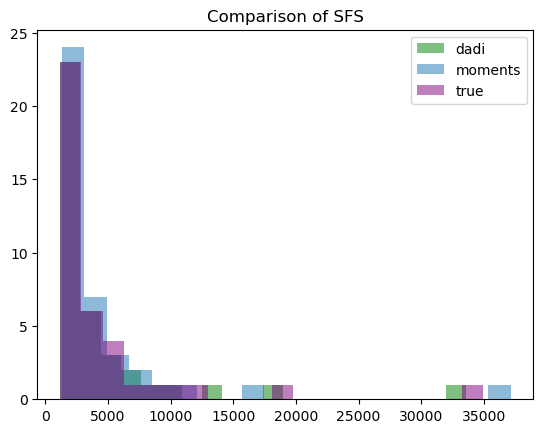

In [38]:
plt.figure()
plt.title("Comparison of SFS")
plt.hist(data['model_sfs_dadi'][0], alpha = 0.5, color = 'green', bins = 20, label = 'dadi')
plt.hist(data['model_sfs_moments'][0], alpha = 0.5, bins = 20, label = 'moments')
plt.hist(data['sfs'], alpha = 0.5, bins = 20,  color = 'purple',label = 'true')
plt.legend()
plt.show()


# Preprocessing Object

Raw values, no normalization

In [3]:
# Load in the results from the preprocessing
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_model_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_10_top_values_5/preprocessing_results_obj.pkl", "rb") as f:
    results = pickle.load(f)

In [4]:
results.keys()

dict_keys(['training', 'validation'])

In [5]:
results['training']['predictions'][0,1,0,:]

array([12773.57669497, 19163.4557875 , 14872.98271236,  9736.87576562])

In [9]:
results['training']['predictions'][0,0,1,:]

array([12835.8322299 , 19253.74834485, 14761.20706438,  9626.87417242])

In [10]:
results['training']['predictions'][0,1,1,:]

array([12835.8322299 , 19253.74834485, 14761.20706438,  9626.87417242])

In [8]:
results['training']['predictions'].shape

(8, 5, 2, 4)

In [11]:
results['training']['targets'][0,0,0,:]

array([9293, 4287, 6478, 1705,  991])

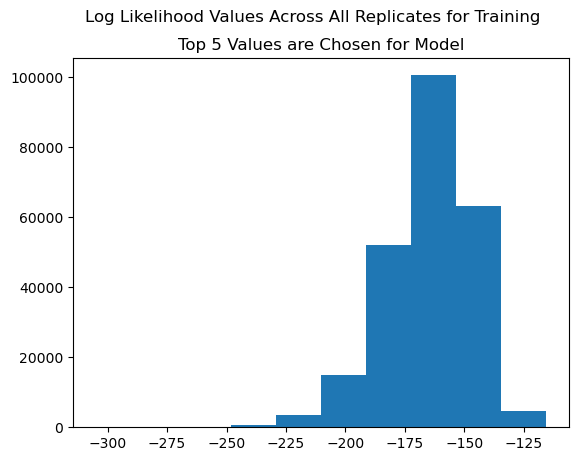

In [9]:
plt.figure()
plt.suptitle("Log Likelihood Values Across All Replicates for Training")
plt.title("Top 5 Values are Chosen for Model")
plt.hist(results['training']['ll_values'].flatten())
plt.show()


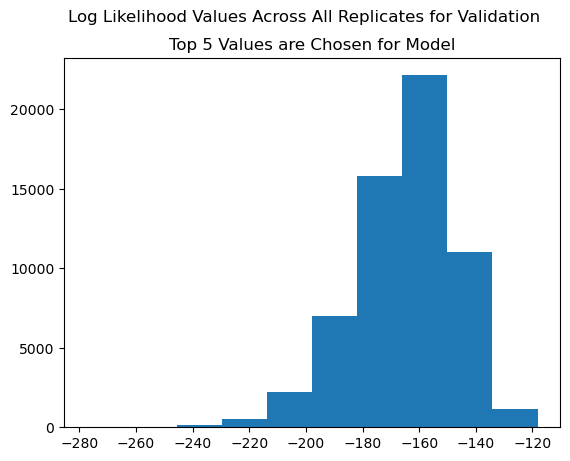

In [10]:
plt.figure()
plt.suptitle("Log Likelihood Values Across All Replicates for Validation")
plt.title("Top 5 Values are Chosen for Model")
plt.hist(results['validation']['ll_values'].flatten())
plt.show()

# Postprocessing Object 

In [3]:
with open('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_30000_sims_inference_5_seed_42_num_replicates_10_top_values_5/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [18]:
features_and_targets.keys()

dict_keys(['training', 'validation'])

In [6]:
features_and_targets['training']['features'].shape

(24000, 100)

In [19]:
features_and_targets['training']['targets'].shape

(24000, 5)

# SNN Model Object

In [11]:
# load in the pickle file
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/models/sims_pretrain_30000_sims_inference_5_seed_42_num_replicates_10_top_values_5/num_hidden_neurons_100_num_hidden_layers_3_num_epochs_100_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False/snn_results.pkl", "rb") as f:
    snn_results = pickle.load(f)

In [12]:
snn_results['training']['predictions']

array([[-0.27685636,  0.7858363 , -0.03507229,  0.5152776 , -0.3788547 ],
       [ 1.3528893 ,  0.7296727 ,  1.312596  , -0.86350626,  0.32558846],
       [ 0.15864399,  0.32548797,  0.6119485 , -0.20045082, -0.13746384],
       ...,
       [ 1.1444926 ,  0.69740325, -1.0354195 ,  1.0998732 , -0.8802647 ],
       [-0.43583262,  0.14013962,  0.53133595, -0.16505927,  0.15778604],
       [-1.0014057 , -0.5010722 , -0.09230404,  0.5642667 , -0.2425445 ]],
      dtype=float32)

In [13]:
snn_results['training']['targets']

array([[-0.28578838,  1.26439709, -0.77595876,  1.44799448, -1.22975607],
       [ 0.97687666,  1.60387905,  1.53113291,  0.47111782,  0.15588457],
       [-0.03810512, -0.05196152,  1.26093299,  0.13856406, -1.69740979],
       ...,
       [ 1.55018547,  0.79327927, -1.08772791,  1.70433799, -1.73205081],
       [-0.95609205,  0.32216145,  1.55538163, -0.65817931,  0.36373067],
       [-1.59695084, -1.72858671,  0.92837923,  1.09465611,  0.12124356]])

In [14]:
import os
os.chdir('/sietch_colab/akapoor/Demographic_Inference')

In [15]:
from src.utils import root_mean_squared_error

In [16]:
root_mean_squared_error(snn_results['training']['targets'], snn_results['training']['predictions'])

5.574168432433685

In [19]:
snn_results['train_losses']

[0.9564130306243896,
 0.9164372086524963,
 0.9082257151603699,
 0.9025303721427917,
 0.8986430764198303,
 0.8947906494140625,
 0.8917695879936218,
 0.8887090086936951,
 0.8857372403144836,
 0.8822122812271118,
 0.8789960145950317,
 0.8763687014579773,
 0.8731643557548523,
 0.8700491786003113,
 0.8664448857307434,
 0.8629662990570068,
 0.8600810170173645,
 0.8577051162719727,
 0.8537341952323914,
 0.8502210974693298,
 0.8475152850151062,
 0.8440529704093933,
 0.8413931727409363,
 0.8381838798522949,
 0.8354348540306091,
 0.8328824639320374,
 0.829633891582489,
 0.8263094425201416,
 0.8240137100219727,
 0.8204901814460754,
 0.8184861540794373,
 0.8156281113624573,
 0.8132156729698181,
 0.8107284903526306,
 0.808333694934845,
 0.8055511116981506,
 0.8029705286026001,
 0.8004055023193359,
 0.7980291843414307,
 0.7954893708229065,
 0.793367862701416,
 0.790989339351654,
 0.7885128259658813,
 0.7867748141288757,
 0.7844454050064087,
 0.7826260328292847,
 0.7804144024848938,
 0.77841717004776

# Comparing the moments and dadi feature distributions for each analysis type

In [17]:
results['training']['predictions'].shape

(24000, 5, 2, 5)

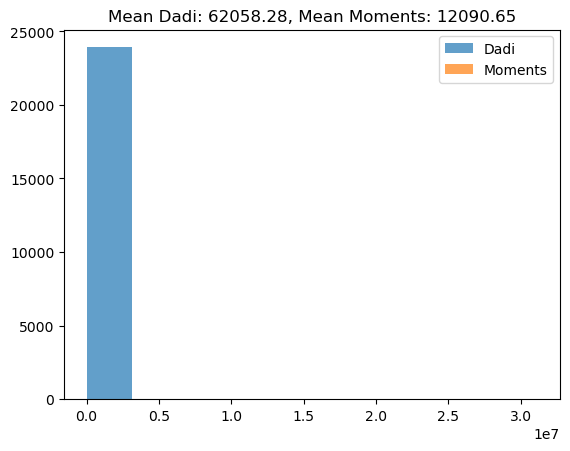

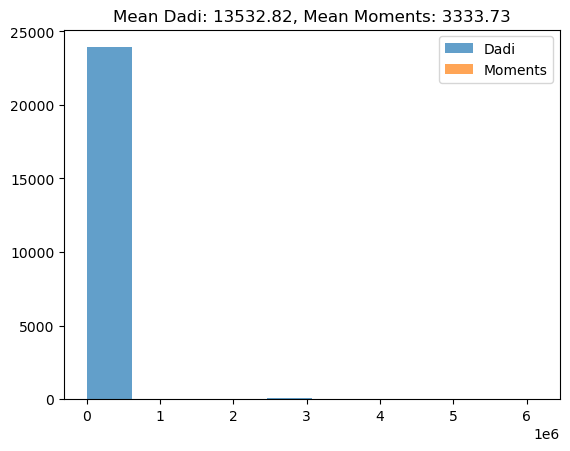

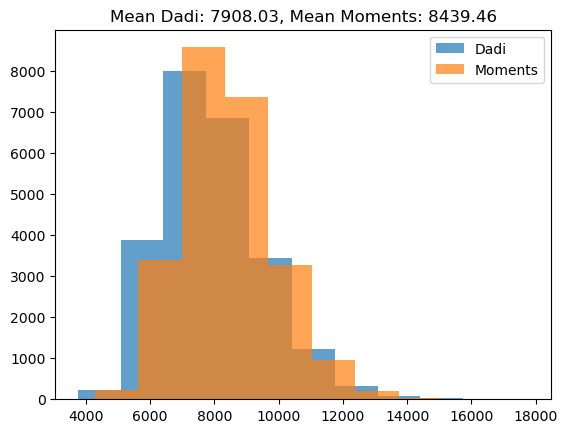

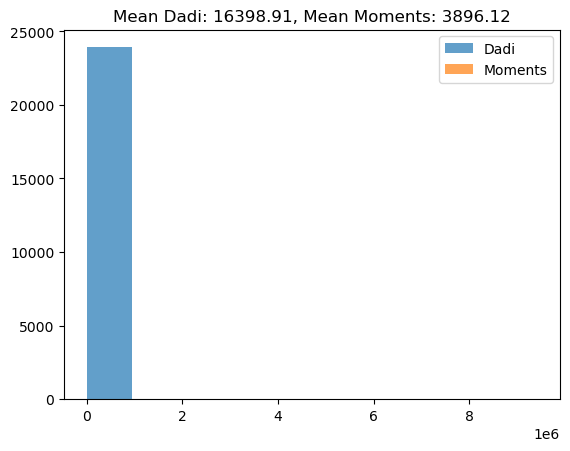

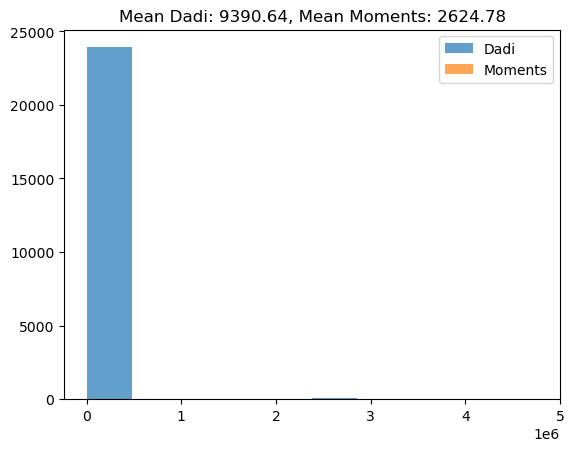

In [19]:
for i in np.arange(results['training']['predictions'].shape[3]):
    plt.figure()
    plt.hist(np.mean(results['training']['predictions'][:,:,0,i], axis = 1), alpha = 0.7, label = 'Dadi')
    plt.hist(np.mean(results['training']['predictions'][:,:,1,i], axis = 1), alpha = 0.7, label = 'Moments')
    # plt.suptitle(f'Distributions for Parameter {results["param_names"][i]}')
    plt.title(f'Mean Dadi: {np.mean(results["training"]["predictions"][:,:,0,i]):.2f}, Mean Moments: {np.mean(results["training"]["predictions"][:,:,1,i]):.2f}')
    plt.legend()
    plt.show()

## Plotting the normalized features against the normalized targets

In [55]:
import json

In [56]:
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_1000_sims_inference_5_seed_42_num_replicates_5/config.json", "rb") as f:
    experiment_config = json.load(f)

In [59]:
# Convert dict values to NumPy arrays for element-wise operations
upper_bound_values = np.array(list(experiment_config['upper_bound_params'].values()))
lower_bound_values = np.array(list(experiment_config['lower_bound_params'].values()))

# Calculate mean and standard deviation vectors
mean_vector = 0.5 * (upper_bound_values + lower_bound_values)
std_vector = (upper_bound_values - lower_bound_values) / np.sqrt(12)  # Correct std deviation for uniform distribution

# Normalize the targets
normalized_features= (results['training']['predictions'] - mean_vector) / (std_vector)

In [60]:
normalized_features.shape

(800, 5, 2, 5)

In [62]:
results['training']['targets'].shape

(800, 5, 2, 5)

Text(0.5, 1.0, 'Dadi Results for Replicate 0 and Parameter 0')

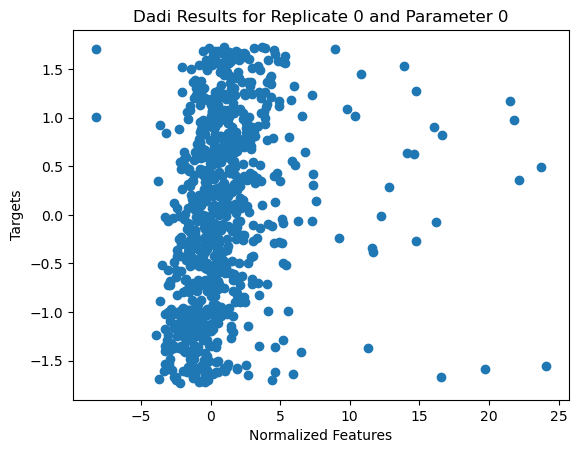

In [64]:
plt.figure()
plt.scatter(normalized_features[:,0,0,0], results['training']['targets'][:,0,0,0])
plt.xlabel("Normalized Features")
plt.ylabel("Targets")
plt.title("Dadi Results for Replicate 0 and Parameter 0")

# Inspecting the postprocessing object

In [16]:
# Load in the results from the preprocessing
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_30000_sims_inference_5_seed_42_num_replicates_5/postprocessing_results.pkl", "rb") as f:
    results = pickle.load(f)

In [17]:
print(results['training'].keys())

dict_keys(['normalization', 'predictions', 'targets'])


In [18]:
results['training']['targets']

array([[-1.10158431,  0.57504087,  1.02537408, -0.69282032,  0.34641016],
       [-1.0704074 ,  0.07967434, -0.4364768 , -1.73205081, -0.25980762],
       [ 0.05888973, -1.56230983,  0.36026657, -1.19857916,  0.51961524],
       ...,
       [-1.3943009 ,  0.4191563 ,  1.66969698, -1.4964919 , -0.69282032],
       [-1.23841633, -0.93184333, -0.58889727, -1.03230228,  0.4330127 ],
       [ 0.68069597, -1.15354584, -0.11777945,  0.78288697,  1.69740979]])

In [19]:
results['training']['predictions'].shape

(24000, 100)

(array([1178., 7259., 5925., 4647., 2868., 1381.,  509.,  181.,   43.,
           9.]),
 array([-1.94558161, -1.25950235, -0.57342309,  0.11265617,  0.79873542,
         1.48481468,  2.17089394,  2.8569732 ,  3.54305246,  4.22913171,
         4.91521097]),
 <BarContainer object of 10 artists>)

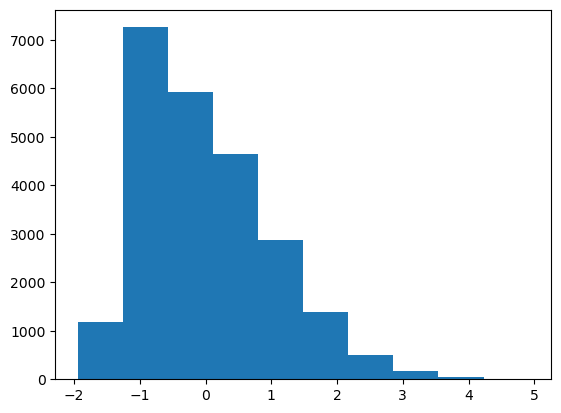

In [20]:
plt.figure()
plt.hist(results['training']['predictions'][:,1].reshape(-1))

In [21]:
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_20_sims_inference_5_seed_42_num_replicates_10_top_values_5/features_and_targets.pkl", "rb") as f:
    feat_targets = pickle.load(f)

In [22]:
feat_targets['training']['targets'].shape

(16, 5)

In [23]:
feat_targets['training']['features'].shape

(16, 100)

In [25]:
training_features = np.load('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_30000_sims_inference_5_seed_42_num_replicates_5/training_features.npy')
training_targets = np.load('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_30000_sims_inference_5_seed_42_num_replicates_5/training_targets.npy')


In [26]:
training_targets.shape

(24000, 5)

In [34]:
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_5/preprocessing_results_obj.pkl", "rb") as f:
    preproc = pickle.load(f)

In [40]:
preproc['training']['upper_triangular_FIM_reshape'].shape

(8, 50)

# Looking at the model object

In [14]:
# load in the pickle file
with open("/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/models/sims_pretrain_20_sims_inference_5_seed_42_num_replicates_10_top_values_5/num_hidden_neurons_32_num_hidden_layers_2_num_epochs_100_dropout_value_0_weight_decay_0_batch_size_65_EarlyStopping_False/snn_results.pkl", "rb") as f:
    snn_results = pickle.load(f)

In [17]:
snn_results['training']['predictions']

array([[-0.09165932, -0.5001215 , -0.36721432,  0.549234  ,  0.25978643],
       [-0.32071072,  0.06644828, -0.42295933,  0.7383808 ,  0.16505006],
       [-0.7613377 , -0.51912594, -0.0482407 , -0.4106861 , -0.2085247 ],
       [ 0.7372219 , -0.6358212 ,  0.32851025, -0.8306132 ,  0.1491667 ],
       [-0.63253134, -0.706846  ,  0.37159544,  0.870636  ,  0.59650046],
       [-0.25296324, -0.665297  , -0.94232535,  0.88276577,  0.38834116],
       [ 0.18619998, -0.3285056 ,  0.44647533, -0.37117675,  0.7135037 ],
       [-0.261832  ,  0.09030104, -0.68623143,  0.8385078 ,  0.69678575],
       [ 0.03062807, -0.78067243,  0.68156064,  0.5500494 ,  0.46673122],
       [ 0.62431407,  0.29882404, -0.85593665, -0.7566929 ,  0.84018785],
       [-0.6709076 , -1.1919916 ,  0.5807067 , -0.6924355 ,  0.29716536],
       [ 0.10428606, -0.23696262, -1.139593  , -0.44980666,  1.0191001 ],
       [-0.2857257 , -0.36529377, -0.16536307,  0.57529324, -0.13351917],
       [-0.58084077, -0.5468821 ,  0.6

In [18]:
snn_results['training']['targets']

array([[-1.01844587, -0.52654345, -1.01844587,  1.65584057,  0.05196152],
       [-1.59521879,  0.6512511 , -0.90413052,  1.44106627,  0.03464102],
       [-1.62119956, -1.40642526, -0.13509996, -1.15700994, -0.29444864],
       [ 1.51900856, -0.74131775,  1.52420471, -1.57270213, -0.01732051],
       [-1.60387905, -1.02537408,  0.28059223,  1.17086635,  1.40296115],
       [-1.16220609, -0.91105872, -1.66623288,  1.11544072,  0.62353829],
       [-0.48497423, -0.40876399,  0.77595876, -0.50575884,  1.42028166],
       [-1.19165096,  0.14549227, -0.8660254 ,  1.44799448,  1.03923048],
       [-0.2078461 , -1.69394569,  1.68701749,  1.02537408,  0.98726896],
       [ 0.93011128,  1.20204326, -1.30250221, -1.5103483 ,  1.03923048],
       [-1.31809066, -1.56577393,  1.32675092, -1.42028166,  0.8487049 ],
       [-0.78635107, -0.35333836, -1.60387905, -0.71360493,  1.55884573],
       [-1.14315353, -0.67549981, -0.79674337,  1.59348674, -0.8660254 ],
       [-1.38910475, -0.6512511 ,  1.1

In [19]:
from src.utils import root_mean_squared_error

In [21]:
root_mean_squared_error(snn_results['training']['targets'], snn_results['training']['predictions'])

3.03353714208007

In [22]:
root_mean_squared_error(snn_results['validation']['targets'], snn_results['validation']['predictions'])

3.2852678681879914

In [23]:
import numpy as np

def rrmse(y_true, y_pred):
    # Ensure y_true and y_pred have the same shape
    assert y_true.shape == y_pred.shape, "Shapes of y_true and y_pred must match"

    # Check for zeros in y_true to avoid division by zero
    if np.any(y_true == 0):
        zero_indices = np.where(y_true == 0)
        raise ValueError(f"Division by zero encountered in y_true at indices {zero_indices}")

    # Compute relative error
    relative_error = (y_pred - y_true) / y_true
    squared_relative_error = np.square(relative_error)
    
    # Take mean over all parameters
    rrmse_value = np.sqrt(np.mean(squared_relative_error))
    
    return rrmse_value

In [24]:
rrmse(snn_results['training']['targets'], snn_results['training']['predictions'])

1.3566390523922947

In [25]:
rrmse(snn_results['validation']['targets'], snn_results['validation']['predictions'])

1.4692164555128335